B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 18.440173534975216 180.7420814309717 105.37341518064503
B4 2.0999999999999943 97.67061537707829 

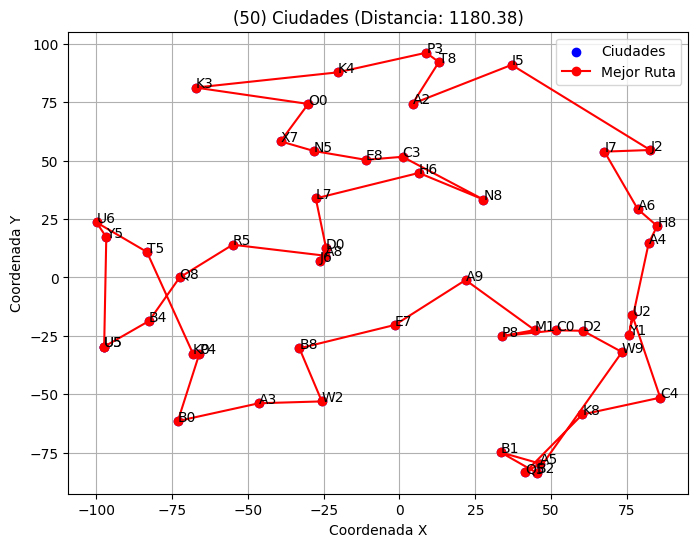

Ruta después de aplicar 2-opt para evitar cruces:


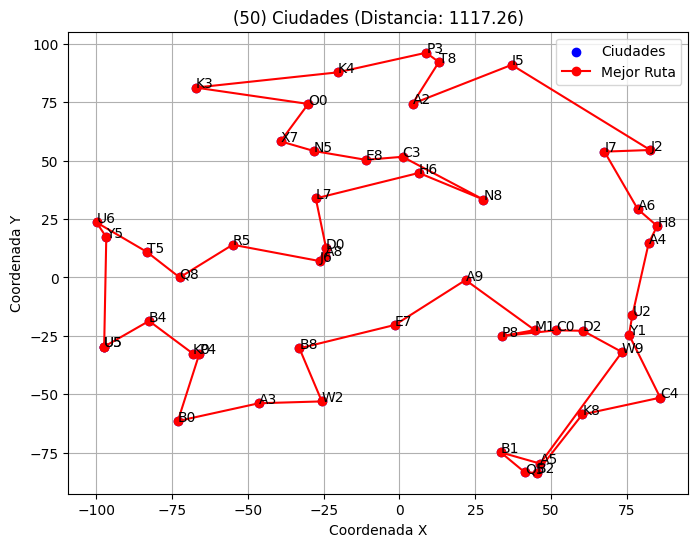

In [2]:
# Implementación de heurística para evitar cruces en el problema TSP

import numpy as np
from util import generar_ciudades_con_distancias, plotear_ruta, calculate_path_distance
from TSP import TSP


# Función para detectar si dos líneas se cruzan
def lines_cross(p1, p2, p3, p4):
    """Returns True if lines (p1, p2) and (p3, p4) cross each other"""

    def ccw(A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])

    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)


# Función que realiza un 2-opt swap para eliminar cruces
def two_opt_swap(route, i, j):
    """Perform 2-opt swap by reversing the order of the route between nodes i and j"""
    new_route = route[:i] + route[i:j + 1][::-1] + route[j + 1:]
    return new_route


# Implementación de la heurística de evitar cruces
def avoid_crosses(ciudades, distancias, ruta):
    n = len(ruta)
    improved = True
    while improved:
        improved = False
        for i in range(n - 1):
            for j in range(i + 2, n):
                if j - i == 1:  # No intercambiamos segmentos consecutivos
                    continue
                # Coordenadas de los puntos
                p1, p2 = ciudades[ruta[i]], ciudades[ruta[i + 1]]
                p3, p4 = ciudades[ruta[j]], ciudades[ruta[(j + 1) % n]]
                # Detectar si hay cruce
                if lines_cross(p1, p2, p3, p4):
                    ruta = two_opt_swap(ruta, i + 1, j)
                    improved = True
    return ruta


# Probar la heurística de evitar cruces
def study_case_avoid_crosses():
    n_cities = 50
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)

    # Generamos una ruta inicial usando una heurística existente
    tsp = TSP(ciudades, distancias, heuristics=['vecino_cercano'])
    ruta_inicial = tsp.encontrar_la_ruta_mas_corta(0.05, 30, False)

    print("Ruta inicial con cruces:")
    tsp.plotear_resultado(ruta_inicial, True)

    # Aplicamos la heurística de evitar cruces
    ruta_sin_cruces = avoid_crosses(ciudades, distancias, ruta_inicial)

    print("Ruta después de aplicar 2-opt para evitar cruces:")
    tsp.plotear_resultado(ruta_sin_cruces, True)


study_case_avoid_crosses()
